In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json


# News Category Dataset

## Context

### Dataset Overview: News Headlines (2012-2022)

- **Total Headlines:** Approximately 210,000
- **Time Span:** 2012 to 2022
- **Data Distribution:**
  - **2012 - May 2018:** ~200,000 headlines
  - **May 2018 - 2022:** ~10,000 headlines

## Content

Each record in the dataset consists of the following attributes:

- **category**: category in which the article was published.
- **headline**: the headline of the news article.
- **authors**: list of authors who contributed to the article.
- **link**: link to the original news article.
- **short_description**: Abstract of the news article.
- **date**: publication date of the article.

# Approach/Workflow

- **Overview**
- **Text Preparation**
- **Exploratory Data Analysis (EDA)**
- **Traditional ML Approach**
- **Deep Learning Approach**
- **Transfer Learning Approach**

# Overview

In [52]:
import pandas as pd
import numpy as np

# Show all columns
pd.set_option("display.max_columns", None)

# Show all rows
pd.set_option("display.max_rows", None)

# Set maximum column width to None to avoid truncation
pd.set_option('display.max_colwidth', None)

In [53]:
df = pd.read_json("/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json", lines = True)
df.sample(15)

,link,headline,category,short_description,authors,date
97980,https://www.huffingtonpost.com/entry/sleepy-baby-elephant-pick_b_7504928.html,Sleepy Baby Elephant Picks One Awful Napping Spot,GOOD NEWS,A couple tourists to Krueger National Park in South Africa got to witness one little guy fall behind when he couldn't keep up when they stumbled upon a baby elephant in the road.,"LittleThings, ContributorLife's about the LittleThings",2015-06-03
83080,https://www.huffingtonpost.com/entry/jeb-bush-first-to-last_us_564a18e3e4b045bf3df02b6c,"Jeb Bush Opens Up On The Meaning Of Life, Donald Trump’s Neckties",POLITICS,"“It’s dogged, dogged, dogged determination -- never giving up.""",Scott Conroy and Jon Strauss,2015-11-17
76761,https://www.huffingtonpost.com/entry/smith-cloud-images-space_us_56ab7f0be4b0010e80e9b513,"A Giant Gas Cloud Is Coming Toward Us At 700,000 Miles Per Hour",SCIENCE,We only have 30 million years until it plows into the Milky Way.,Steven Hoffer,2016-01-29
122111,https://www.huffingtonpost.com/entry/parental-safety-guns_b_5736694.html,"We Need Parental Safety, Not Just Gun Safety",POLITICS,"Friends of mine who have guns in a household with children don't want to believe that their home is actually less safe, not more. Those who believe in a society with no guns (me), and those who are training their kids on firearms at the age of 5, will never be able to agree on this.","Chris Peak, ContributorChris is a freelance writer and editor from Boston. He's writt...",2014-08-29
119474,https://www.huffingtonpost.com/entry/lgbt-wellness-september-2_n_5890722.html,Here's How Queer Men Could Help Cut Their Risk For Cancer,QUEER VOICES,,JamesMichael Nichols,2014-09-28
208420,https://www.huffingtonpost.com/entry/pleated-skirts-for-women_us_5b9b4bb4e4b03a1dcc766efc,Pleated Skirts: 14 Bottoms That Won't Break The Bank (PHOTOS),STYLE & BEAUTY,We are always on the lookout for things that can go from season to season -- with the economy in the toilet who can afford,Christina Anderson,2012-02-09
33551,https://www.huffingtonpost.com/entry/the-london-attacks-its-ok-to-look-away_us_5933ea69e4b00573ab57a457,The London Attacks; It's OK to Look Away,HEALTHY LIVING,"Last night as Londoners enjoyed a warm evening, watched the Champions League, drank in the bars and restaurants which surround","Karen L Pollock, ContributorCounsellor and Psychotherapist",2017-06-04
17537,https://www.huffingtonpost.com/entry/little-kids-think-birthday-parties-cause-aging-says-worlds-cutest-study_us_5a3a9d74e4b0b0e5a79f05ee,"Apparently, Little Kids Think Birthday Parties Cause Aging",PARENTS,World's cutest study.,Catherine Pearson,2017-12-23
175533,https://www.huffingtonpost.com/entry/indian-breakfast-recipe_us_5b9cc193e4b03a1dcc818f68,12 Amazing South Indian Breakfasts,FOOD & DRINK,"Old men sipping at small glasses of sweet milky coffee, foamed up to perfection by pouring it from one cup to another. They stand at tables, eating Khara Bath, Kesari Bath, Chow Chow Bath, and so many other breakfasts.","Andy Deemer, Contributor\nFast food horror filmmaker",2013-01-28
114831,https://www.huffingtonpost.com/entry/the-new-immigration-probl_b_6198546.html,The New Immigration Problem,POLITICS,"While the problem to some is that the President spoke at all, the real problem is that we're now saddled with an executive order that cannot be implemented in any meaningful way.","Joseph Blady, M.D., ContributorFormer program officer for the Under Secretary of Defense for ...",2014-11-21


- The dataset covers diverse topics, such as "World News," "Wellness," "Travel," "Business," etc.
- We can remove the link because the words in the link are already present in the headline.
- Separate the year, month, and day of the week.
- Check whether all entries in the "category" column are in uppercase.
- Check which cells are empty.


In [54]:
# What is the size of the dataset?

# Provide information about the number of rows and columns
df.shape


(209527, 6)

- **Rows:** 209,527
- **Columns:** 6


In [55]:
# What are the data types of the columns?

# Show the basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


- The data types of the columns are object type, except for the "data" column.


In [56]:
# Are there any missing values in the dataset?
df.isnull().sum()


link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

- There are no missing values.


In [57]:
# What does the data look like?
df.describe(include=['object', 'datetime'])


,link,headline,category,short_description,authors,date
count,209527,209527,209527,209527,209527,209527
unique,209486,207996,42,187022,29169,NaN
top,https://www.huffingtonpost.comhttp://stylelikeu.com/closets/megan-lecrone/,Sunday Roundup,POLITICS,,,NaN
freq,2,90,35602,19712,37418,NaN
mean,NaN,NaN,NaN,NaN,NaN,2015-04-30 00:44:14.344308736
min,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,2013-08-10 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,2015-03-16 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,2016-11-01 00:00:00
max,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00


- 50% of the data is from 2012 to 2015.
- The remaining 50% of the data is from 2015 to 2022.


In [58]:
# Are there any duplicate entries in the dataset?
df.duplicated().sum()


13

- There are 13 duplicate values present.


In [59]:
# Checking the number of unique categories in each column
df.nunique()


link                 209486
headline             207996
category                 42
short_description    187022
authors               29169
date                   3890
dtype: int64

- There are 42 categories in the category column, but we need to work on only the top 15 categories.
- With so many unique authors, it introduces more noise than value, eliminate it.
- In the date column, separate the year, month, and day.

## Text Preparation 


In [60]:
# Extracting the top 15 categories
top_15_categories = df['category'].value_counts().nlargest(15)

# Updating the dataset to include only the top 15 categories
df = df[df['category'].isin(top_15_categories.index)]

top_15_categories


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
Name: count, dtype: int64

In [61]:
# Removing the 'link' and 'authors' columns
df = df.drop(columns=["link", "authors"])


In [62]:
# Separating the year, month, and day of the week from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%b')  # Abbreviated month names (e.g., Jan, Feb)
df['day_of_week'] = df['date'].dt.day_name()  # Full names of the days (e.g., Monday)

# Dropping the date column
df = df.drop(columns=["date"])

# Removing duplicate entries
df = df.drop_duplicates()


In [63]:
df.sample()

,headline,category,short_description,year,month,day_of_week
198204,A Conversation With Decorator and Author Charlotte Moss,STYLE & BEAUTY,"Charlotte Moss is one of the grande dames of the decorating world: iconic, revered and forever looked to for all things related to stylish and luxurious living.",2012,May,Tuesday


In [64]:
from bs4 import BeautifulSoup
import re


import nltk
nltk.download('brown')
nltk.download('punkt')


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- Remove HTML tags.


In [65]:
# Removing HTML tags (although there are no HTML elements in the dataset except in the link feature)

# Assuming your dataframe is named 'df'
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply the cleaning function to the specified columns
columns_to_clean = ['headline', 'category', 'short_description']
for column in columns_to_clean:
    df[column] = df[column].apply(clean_html)


/tmp/ipykernel_30/2231838842.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
/tmp/ipykernel_30/2231838842.py:5: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


- Strip out emojis or convert them into a textual representation.

In [66]:
# Function to remove emojis from text
def remove_emojis(text):
    pattern = re.compile(
        "["u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # geometric shapes extended
        u"\U0001F800-\U0001F8FF"  # supplemental arrows-C
        u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        u"\U0001FA00-\U0001FA6F"  # chess symbols
        u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
        u"\U00002702-\U000027B0"  # dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return pattern.sub(r'', text)

# Apply the emoji removal function to the specified columns
columns_to_clean = ['headline', 'category', 'short_description']
for column in columns_to_clean:
    df[column] = df[column].apply(remove_emojis)


In [67]:


import nltk

# Downloading the necessary packages to a custom directory
nltk.download('punkt', download_dir='/kaggle/working')
nltk.download('stopwords', download_dir='/kaggle/working')
nltk.download('wordnet', download_dir='/kaggle/working')
nltk.download('omw-1.4', download_dir='/kaggle/working')

# Setting the NLTK data path
nltk.data.path.append('/kaggle/working')

# Now you can run the rest of your code


[nltk_data] Downloading package punkt to /kaggle/working...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /kaggle/working...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /kaggle/working...
[nltk_data]   Package omw-1.4 is already up-to-date!


- **Sequence of Steps:**
  - **Lowercasing:** Convert all text to lowercase to ensure uniformity.
  - **Removing Digits and Punctuation:** Clean the text by removing unwanted characters.
  - **Sentence Tokenization:** Split text into individual sentences.
  - **Word Tokenization:** Split sentences into individual words.
  - **Stop Word Removal:** Eliminate common words that do not contribute to the text's meaning.
  - **Lemmatization:** Reduce words to their root forms or base forms.


In [68]:
!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.noun  
  inflating: /usr/shar

In [69]:
import pandas as pd
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure that you have downloaded the necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove digits and punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    # Sentence tokenization
    sentences = sent_tokenize(text)

    # Word tokenization and processing for each sentence
    processed_text = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        # Remove stop words
        words = [word for word in words if word not in stop_words]
        # Apply stemming and lemmatization
        words = [lemmatizer.lemmatize(word) for word in words]
        processed_text.extend(words)
    
    return processed_text

# Apply the preprocessing function to the specified columns
columns_to_process = ['headline', 'short_description']
for column in columns_to_process:
    df[column + '_processed'] = df[column].apply(preprocess_text)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [70]:
df.sample(3)

,headline,category,short_description,year,month,day_of_week,headline_processed,short_description_processed
10815,Stormy Daniels Reveals Sketch Of Man Who Allegedly Threatened Her Over Trump Story,POLITICS,"The adult film actress says a ""thug"" demanded she stay quiet about an alleged affair she had with Trump in 2006.",2018,Apr,Tuesday,"[stormy, daniel, reveals, sketch, man, allegedly, threatened, trump, story]","[adult, film, actress, say, thug, demanded, stay, quiet, alleged, affair, trump]"
100155,"TPP, Fast Track, Will Drive Consumers to China for Affordable Medicines",POLITICS,"The TPP and other trade agreements create an economic race to the bottom, creating a nation of Walmart shoppers rather than family wage jobs and an economically and environmentally sustainable future.",2015,May,Saturday,"[tpp, fast, track, drive, consumer, china, affordable, medicine]","[tpp, trade, agreement, create, economic, race, bottom, creating, nation, walmart, shopper, rather, family, wage, job, economically, environmentally, sustainable, future]"
164655,Mommy Heartbreak,PARENTING,"I tried to hear what was wrong in between the sobs, but she only managed to get a few words out between the tears. She was gasping for air. My heart sank. I had 12 trustees waiting for me to finish a presentation on a $1 billion asset allocation strategy.",2013,May,Wednesday,"[mommy, heartbreak]","[tried, hear, wrong, sob, managed, get, word, tear, gasping, air, heart, sank, trustee, waiting, finish, presentation, billion, asset, allocation, strategy]"


# EDA

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

- Visualization of the top 15 category frequencies.


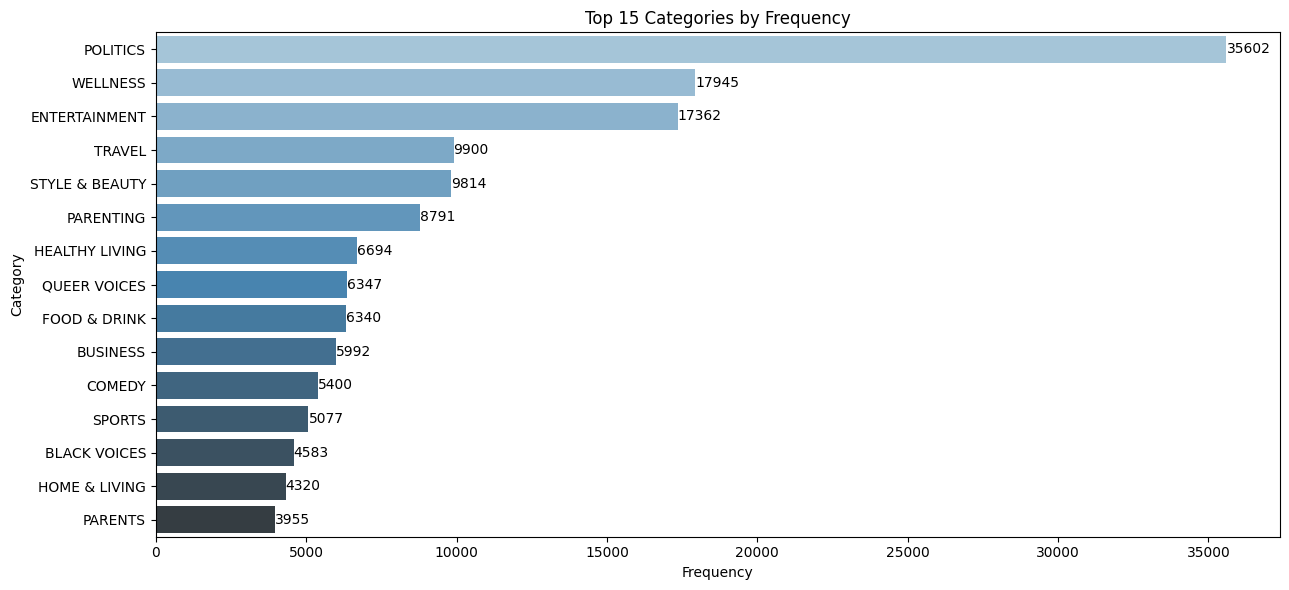

In [72]:
# Create a horizontal bar chart
plt.figure(figsize=(13, 6))
sns.barplot(x=top_15_categories.values, y=top_15_categories.index, palette='Blues_d')

# Display frequency values at the end of each bar
for i, value in enumerate(top_15_categories.values):
    plt.text(value, i, f'{int(value)}', va='center')

plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top 15 Categories by Frequency')
plt.tight_layout()
plt.show()


- The data is unbalanced.
- The Politics category is the most prevalent (35k), followed by Wellness (17k) and Entertainment (17k).
- We can conclude that:
    - There is a strong interest in politics.
    - There is a growing awarness of wellness.
    - There is a focus on travel and beauty.

**Quesiton**
- "Parent" and "Parenting" can be considered similar but have different category names.
- Are there any other categories that are similar?


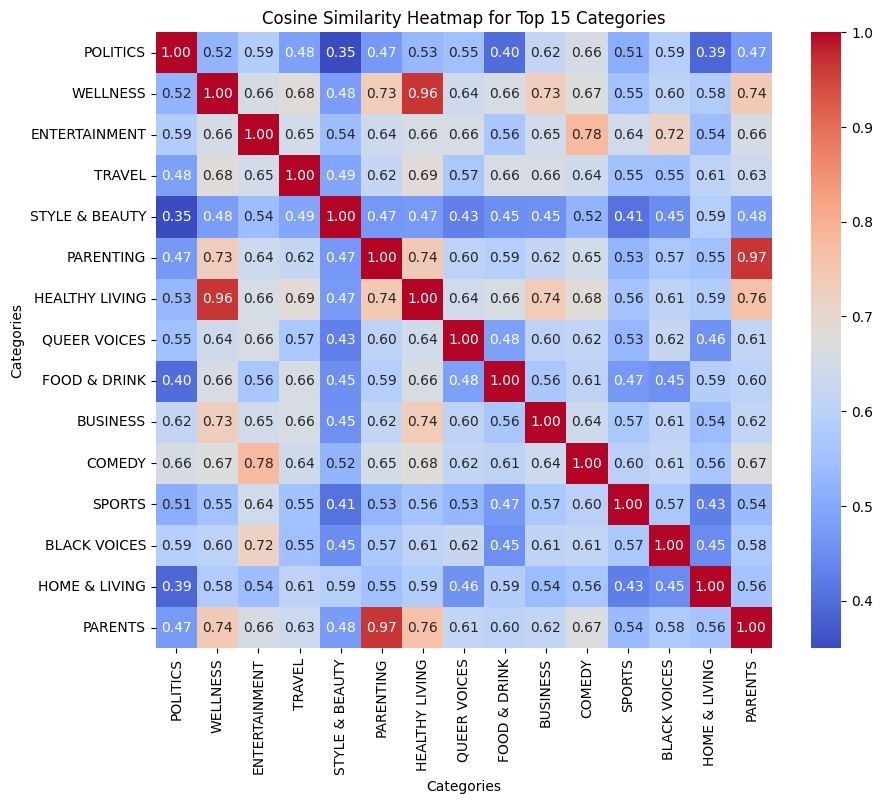

In [73]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract the top 15 categories
top_15_categories = df['category'].value_counts().nlargest(15).index

# Step 2: Create a dictionary to hold concatenated texts for each category
concatenated_texts = {}
for category in top_15_categories:
    concatenated_texts[category] = ' '.join(df[df['category'] == category]['short_description_processed'].dropna().astype(str))

# Step 3: Vectorize the concatenated texts using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(list(concatenated_texts.values()))

# Step 4: Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 5: Create a DataFrame for the cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=concatenated_texts.keys(), columns=concatenated_texts.keys())

# Step 6: Plot the heatmap to visualize the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Cosine Similarity Heatmap for Top 15 Categories')
plt.xlabel('Categories')
plt.ylabel('Categories')
plt.show()


**Highest Cosine Similarities**
- "WELLNESS" & "HEALTHY LIVING" have a cosine similarity of 0.96.
- "PARENT" & "PARENTING" have a cosine similarity of 0.97.

- We can combine these two categories into one.


In [74]:
# Replace 'Parenting' with 'Parents' in the category column
df['category'] = df['category'].replace('PARENTING', 'PARENTS')
df['category'] = df['category'].replace('HEALTHY LIVING', 'WELLNESS')


In [75]:
# Extracting the top 13 categories
top_13_categories = df['category'].value_counts().nlargest(13)

# Updating the dataset to include only the top 13 categories
df = df[df['category'].isin(top_13_categories.index)]

- Visualization of the top 13 categories.

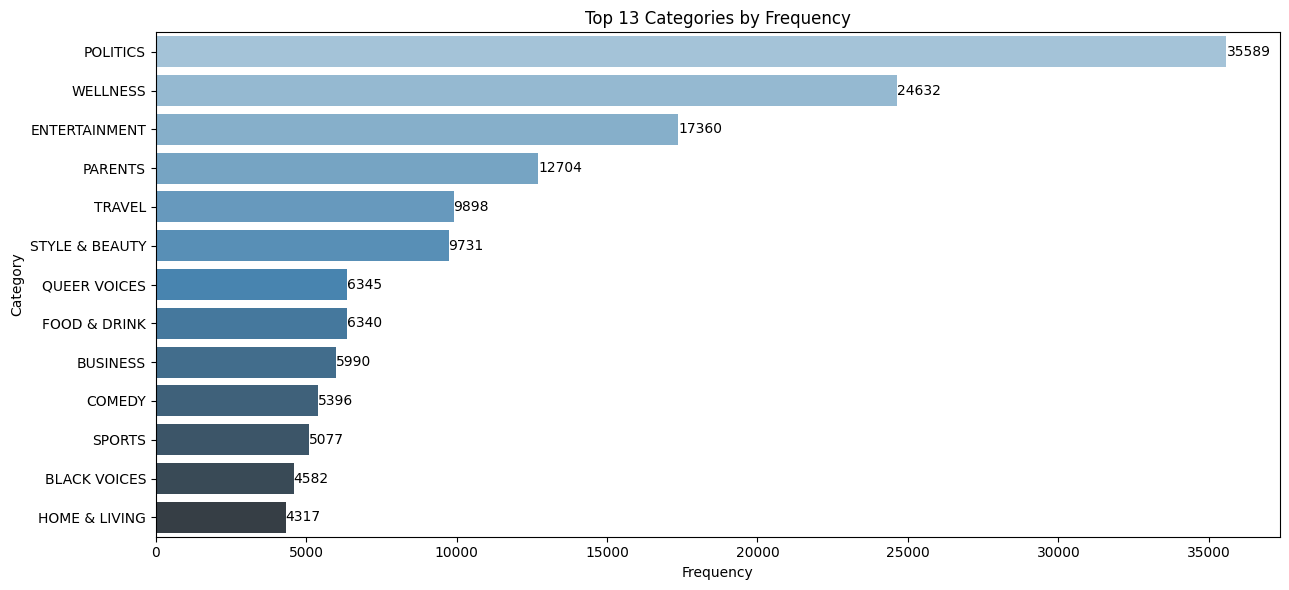

In [76]:
# Create a horizontal bar chart
plt.figure(figsize=(13, 6))
sns.barplot(x=top_13_categories.values, y=top_13_categories.index, palette='Blues_d')

# Display frequency values at the end of each bar
for i, value in enumerate(top_13_categories.values):
    plt.text(value, i, f'{int(value)}', va='center')

plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top 13 Categories by Frequency')
plt.tight_layout()
plt.show()


- **Top 5 Categories**
  - Politics: 35k
  - Wellness: 24k
  - Entertainment: 17k
  - Parents: 12k
  - Travel: 9k


- Pie chart of the top 13 categories.


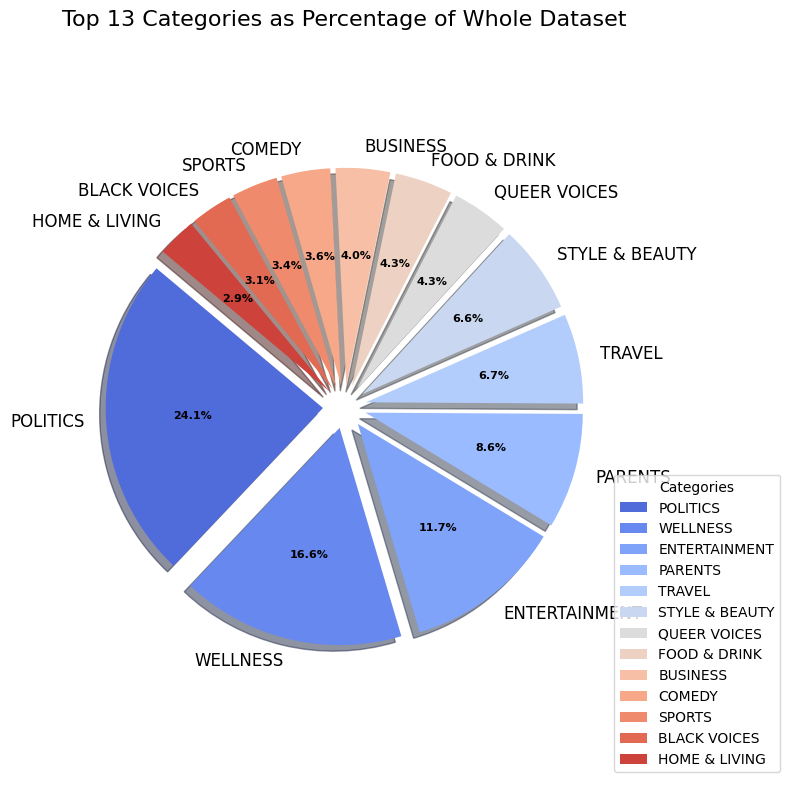

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each category
category_percentage = (top_13_categories / df.shape[0]) * 100

# Create a pie chart with spacing
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    category_percentage, 
    labels=top_13_categories.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(top_13_categories)),  # New color palette
    shadow=True, 
    explode=[0.1] * len(top_13_categories)  # Space between slices
)

# Enhance the text appearance
for text in texts:
    text.set_color('Black')
    text.set_fontsize(12)

for autotext in autotexts:
    autotext.set_color('Black')
    autotext.set_fontsize(8)
    autotext.set_weight('bold')

# Add a legend
plt.legend(wedges, top_13_categories.index, title="Categories", loc="lower left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Top 13 Categories as Percentage of Whole Dataset', fontsize=16, color='Black')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()

# Display the plot
plt.show()


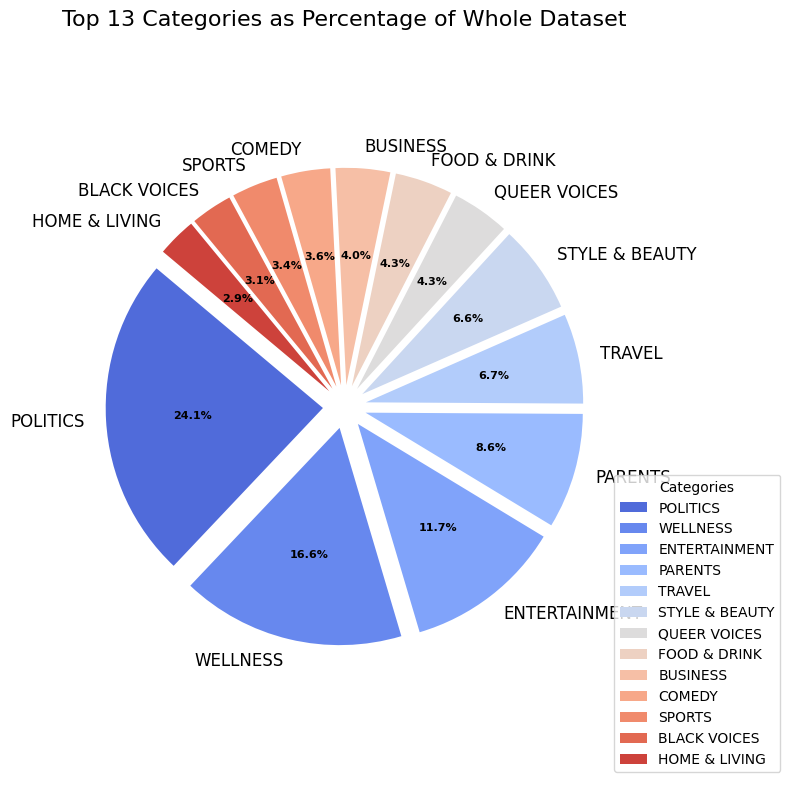

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each category
category_percentage = (top_13_categories / df.shape[0]) * 100

# Create a pie chart with spacing
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    category_percentage, 
    labels=top_13_categories.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(top_13_categories)),  # New color palette
    explode=[0.1] * len(top_13_categories)  # Space between slices
)

# Enhance the text appearance
for text in texts:
    text.set_color('Black')
    text.set_fontsize(12)

for autotext in autotexts:
    autotext.set_color('Black')
    autotext.set_fontsize(8)
    autotext.set_weight('bold')

# Add a legend
plt.legend(wedges, top_13_categories.index, title="Categories", loc="lower left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Top 13 Categories as Percentage of Whole Dataset', fontsize=16, color='Black')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()

# Display the plot
plt.show()


- Politics accounts for 24% of the whole dataset.
- The top 5 categories, i.e., [Politics, Wellness, Entertainment, Parents, Travel], cover more than 50% of the news articles.
- After politics, people are more interested in wellness and entertainment.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


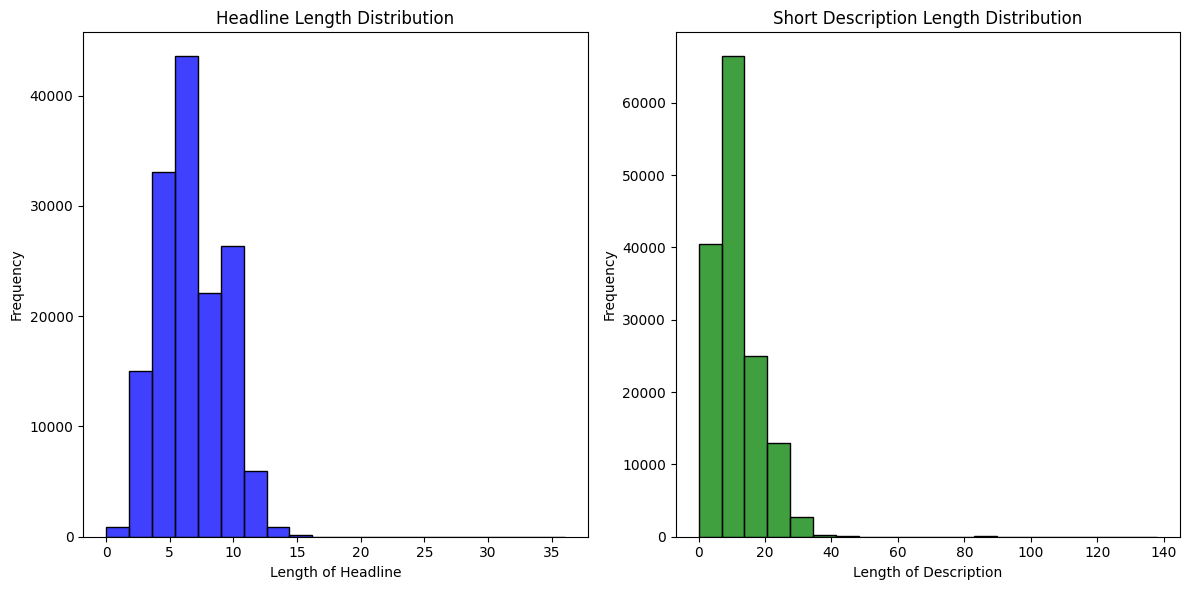

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the lengths of text for each column
df['headline_length'] = df['headline_processed'].apply(len)
df['description_length'] = df['short_description_processed'].apply(len)

# Step 2: Plotting

plt.figure(figsize=(12, 6))

# Plotting the distribution of headline lengths
plt.subplot(1, 2, 1)
sns.histplot(df['headline_length'], bins=20, color='blue')
plt.title('Headline Length Distribution')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')

# Plotting the distribution of description lengths
plt.subplot(1, 2, 2)
sns.histplot(df['description_length'], bins=20, color='green')
plt.title('Short Description Length Distribution')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


- There are very few rows in which the headline isn't present.
- The majority of headlines have lengths between 5 to 10 words.
- Most short descriptions are between 0 to 20 word length, with a significant number having a length of 0.


In [80]:
# Count the number of rows where description_length is 0
total_description_zero = df[df['description_length'] == 0].shape[0]

# Output the result for description_length
print(f"Total number of rows where description_length is 0: {total_description_zero}")

# Count the number of rows where headline_length is 0
total_headline_zero = df[df['headline_length'] == 0].shape[0]

# Output the result for headline_length
print(f"Total number of rows where headline_length is 0: {total_headline_zero}")

# Count the number of rows where both headline_length and description_length are 0
total_both_zero = df[(df['headline_length'] == 0) & (df['description_length'] == 0)].shape[0]

# Output the result for both headline_length and description_length
print(f"Total number of rows where both headline_length and description_length are 0: {total_both_zero}")


Total number of rows where description_length is 0: 11798
Total number of rows where headline_length is 0: 54
Total number of rows where both headline_length and description_length are 0: 10


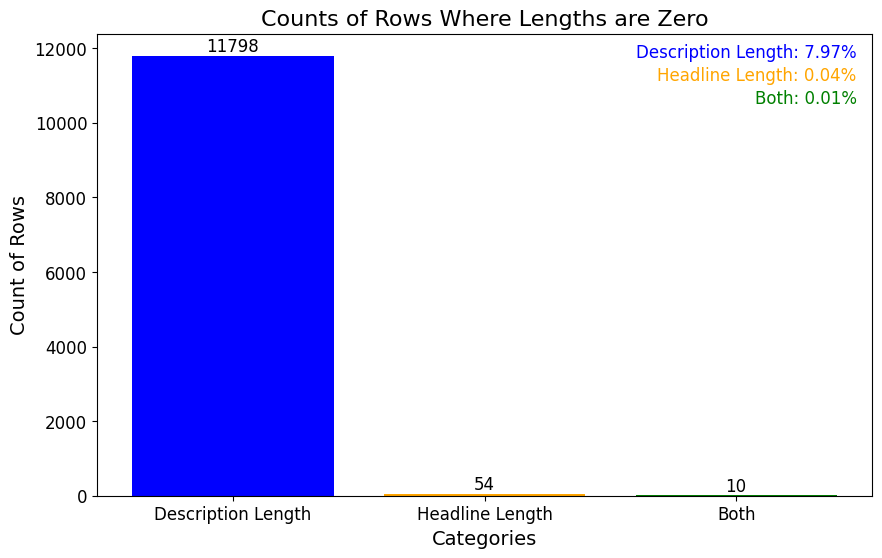

In [81]:
import matplotlib.pyplot as plt

# Data for the counts
categories = ['Description Length', 'Headline Length', 'Both']
counts = [total_description_zero, total_headline_zero, total_both_zero]

# Calculate total number of rows (assuming it's defined somewhere in your script)
total_rows = len(df)  # Example: total number of rows in your DataFrame

# Calculate percentages relative to total rows
percentages = [(count / total_rows) * 100 for count in counts]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['blue', 'orange', 'green'])

# Add frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=12)

# Add percentage text at the top right of the graph
percentage_text = '\n'.join([f'{cat}: {perc:.2f}%' for cat, perc in zip(categories, percentages)])
colors = ['blue', 'orange', 'green']
for i, line in enumerate(percentage_text.split('\n')):
    plt.text(0.98, 0.98 - i*0.05, line, transform=plt.gca().transAxes, fontsize=12, 
             va='top', ha='right', color=colors[i])

# Set titles and labels
plt.title('Counts of Rows Where Lengths are Zero', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count of Rows', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)  # Disable the grid

# Show the plot
plt.show()


- No. of rows where description_length is 0: 11798
- No. of rows where headline_length is 0: 54
- No. of rows where both headline_length and description_length are 0: 10

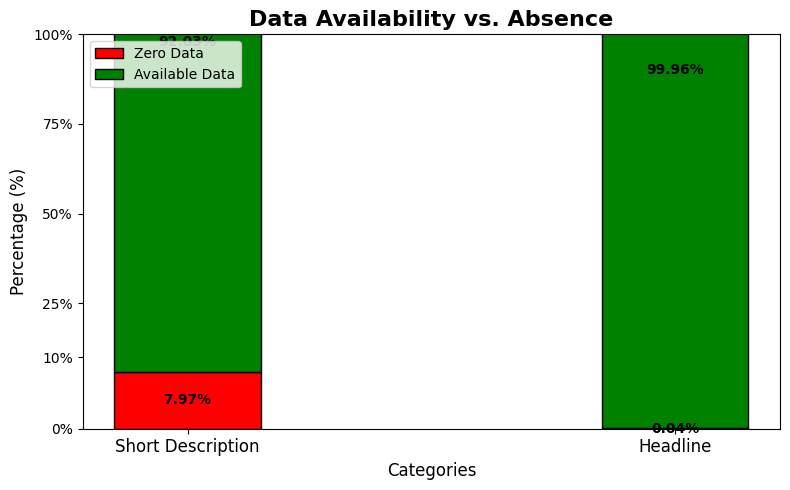

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Total counts
total_short_description = len(df['description_length'])
total_headline = len(df['headline_length'])

# Counts where length is zero
short_description_zero = df[df['description_length'] == 0].shape[0]
headline_zero = df[df['headline_length'] == 0].shape[0]

# Calculate percentages
short_description_zero_pct = (short_description_zero / total_short_description) * 100
short_description_available_pct = 100 - short_description_zero_pct

headline_zero_pct = (headline_zero / total_headline) * 100
headline_available_pct = 100 - headline_zero_pct

# Data for plotting
categories = ['Short Description', 'Headline']
available_percentages = [short_description_available_pct, headline_available_pct]
zero_percentages = [short_description_zero_pct, headline_zero_pct]

# Custom y-axis scale
def custom_scale(value):
    """Custom scale function for the y-axis."""
    if value < 10:  # Expand the lower range
        return value * 4
    return 10 + (value - 10) * 0.5  # Compress the upper range

# Apply the custom scale
custom_y_ticks = [0, 10, 25, 50, 75, 100]
custom_y_values = [custom_scale(tick) for tick in custom_y_ticks]

# Create the bar chart
plt.figure(figsize=(8, 5))

# Bars for zero and available percentages
bar_width = 0.3  # Make the bars narrower
bars_zero = plt.bar(categories, zero_percentages, width=bar_width, color='red', label='Zero Data', edgecolor='black')
bars_available = plt.bar(categories, available_percentages, width=bar_width, color='green', bottom=zero_percentages, label='Available Data', edgecolor='black')

# Add percentage labels to the bars (inside the respective color bars)
for i, (zero_pct, avail_pct) in enumerate(zip(zero_percentages, available_percentages)):
    # Label for zero data (inside red bar)
    plt.text(i, zero_pct / 2, f'{zero_pct:.2f}%', ha='center', va='center', color='black', fontsize=10, weight='bold')
    # Label for available data (inside green bar)
    plt.text(i, zero_pct + avail_pct / 2, f'{avail_pct:.2f}%', ha='center', va='center', color='black', fontsize=10, weight='bold')

# Customize the y-axis
plt.ylim(0, custom_scale(100))
plt.yticks(custom_y_values, [f'{int(tick)}%' for tick in custom_y_ticks])
plt.title('Data Availability vs. Absence', fontsize=16, weight='bold')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper left', fontsize=10)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


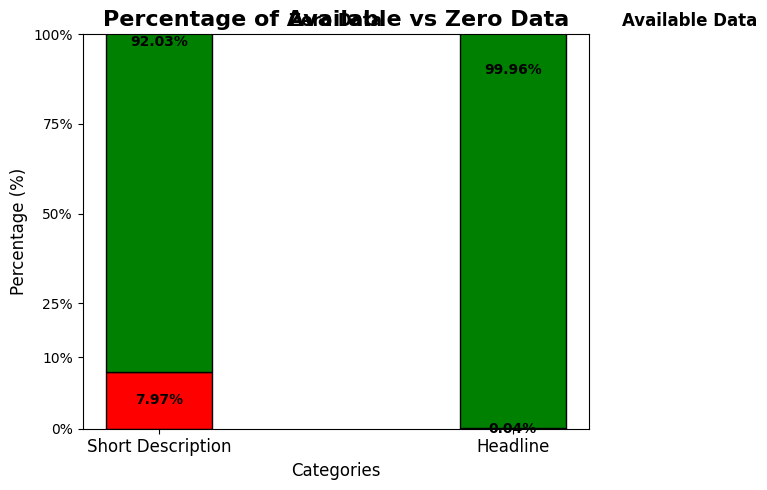

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Total counts
total_short_description = len(df['description_length'])
total_headline = len(df['headline_length'])

# Counts where length is zero
short_description_zero = df[df['description_length'] == 0].shape[0]
headline_zero = df[df['headline_length'] == 0].shape[0]

# Calculate percentages
short_description_zero_pct = (short_description_zero / total_short_description) * 100
short_description_available_pct = 100 - short_description_zero_pct

headline_zero_pct = (headline_zero / total_headline) * 100
headline_available_pct = 100 - headline_zero_pct

# Data for plotting
categories = ['Short Description', 'Headline']
available_percentages = [short_description_available_pct, headline_available_pct]
zero_percentages = [short_description_zero_pct, headline_zero_pct]

# Custom y-axis scale
def custom_scale(value):
    """Custom scale function for the y-axis."""
    if value < 10:  # Expand the lower range
        return value * 4
    return 10 + (value - 10) * 0.5  # Compress the upper range

# Apply the custom scale
custom_y_ticks = [0, 10, 25, 50, 75, 100]
custom_y_values = [custom_scale(tick) for tick in custom_y_ticks]

# Create the bar chart
plt.figure(figsize=(8, 5))

# Bars for zero and available percentages
bar_width = 0.3  # Make the bars narrower
bars_zero = plt.bar(categories, zero_percentages, width=bar_width, color='red', edgecolor='black')
bars_available = plt.bar(categories, available_percentages, width=bar_width, color='green', bottom=zero_percentages, edgecolor='black')

# Add percentage labels to the bars (inside the respective color bars)
for i, (zero_pct, avail_pct) in enumerate(zip(zero_percentages, available_percentages)):
    # Label for zero data (inside red bar)
    plt.text(i, zero_pct / 2, f'{zero_pct:.2f}%', ha='center', va='center', color='black', fontsize=10, weight='bold')
    # Label for available data (inside green bar)
    plt.text(i, zero_pct + avail_pct / 2, f'{avail_pct:.2f}%', ha='center', va='center', color='black', fontsize=10, weight='bold')

# Customize the y-axis
plt.ylim(0, custom_scale(100))
plt.yticks(custom_y_values, [f'{int(tick)}%' for tick in custom_y_ticks])
plt.title('Percentage of Available vs Zero Data', fontsize=16, weight='bold')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(fontsize=12)

# Add the centered labels between the bars
# Center the labels for both categories on the top of the plot
plt.text(0.5, custom_scale(100) * 1.02, 'Zero Data', ha='center', fontsize=12, color='black', weight='bold')
plt.text(1.5, custom_scale(100) * 1.02, 'Available Data', ha='center', fontsize=12, color='black', weight='bold')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


In [84]:

# Remove rows where both 'description_length' and 'headline_length' are zero
df = df[~((df['description_length'] == 0) & (df['headline_length'] == 0))]

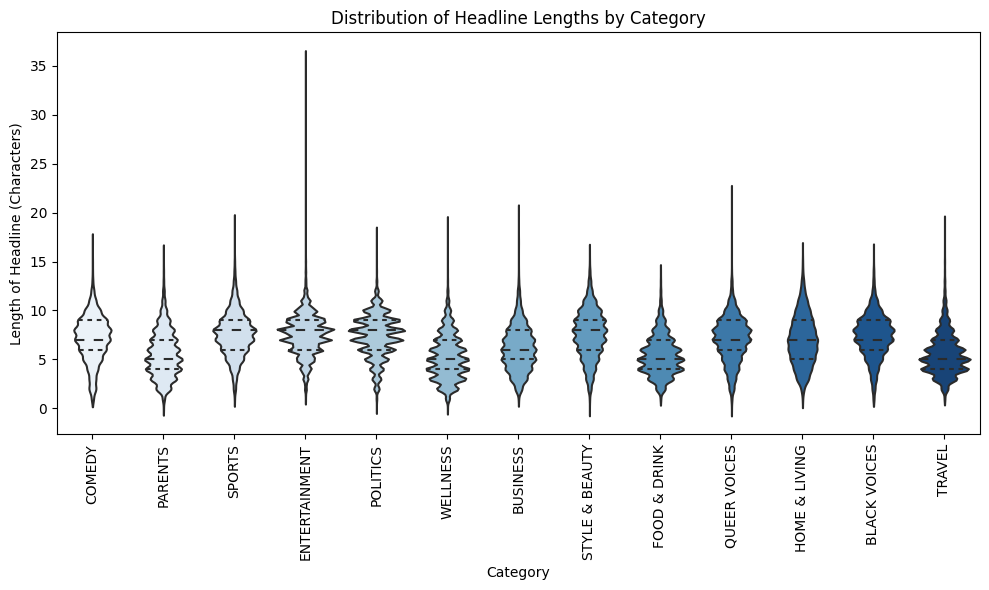

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with specified size
plt.figure(figsize=(10, 6))

sns.violinplot(x='category', y='headline_length', data=df, palette='Blues', inner='quartile')

# Set the title of the plot
plt.title('Distribution of Headline Lengths by Category')

# Set the label for the x-axis
plt.xlabel('Category')

# Set the label for the y-axis
plt.ylabel('Length of Headline (Characters)')

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Adjust the layout to make sure everything fits well in the figure
plt.tight_layout()

# Display the plot
plt.show()


- **Variation in Headline Lengths:** 
  - Each category shows a distinct distribution of headline lengths.
  
- **Entertainment Category:**
  - Has the widest distribution with some headlines reaching up to 35 word length.

- **Comedy, Parents, and Politics:**
  - These categories have shorter median headline lengths, typically under 10 word length.

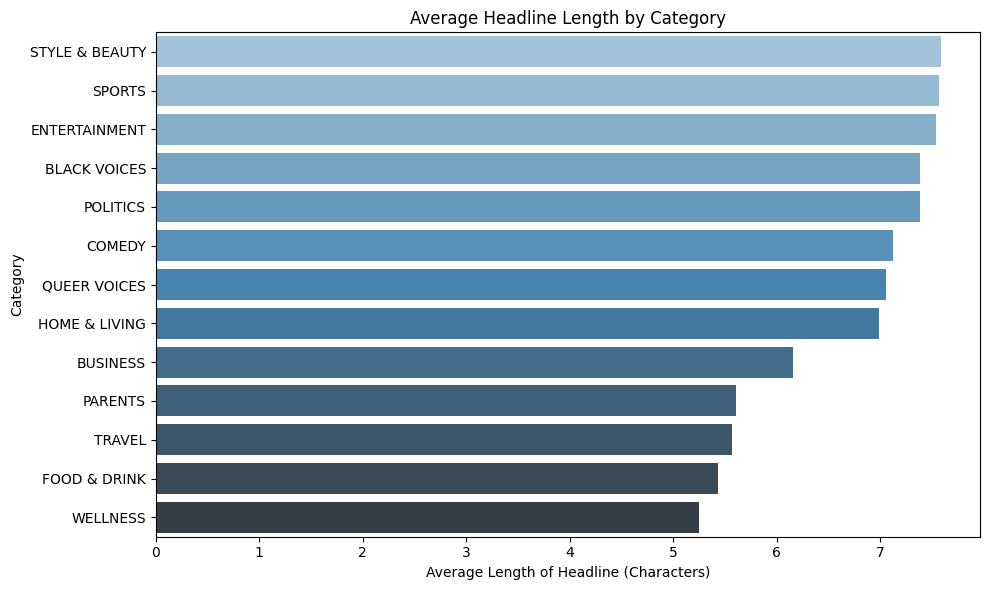

In [86]:
plt.figure(figsize=(10, 6))
avg_length_by_category = df.groupby('category')['headline_length'].mean().sort_values(ascending=False)
sns.barplot(x=avg_length_by_category.values, y=avg_length_by_category.index, palette='Blues_d')
plt.title('Average Headline Length by Category')
plt.xlabel('Average Length of Headline (Characters)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


- Average length is around 6-7 in headline.

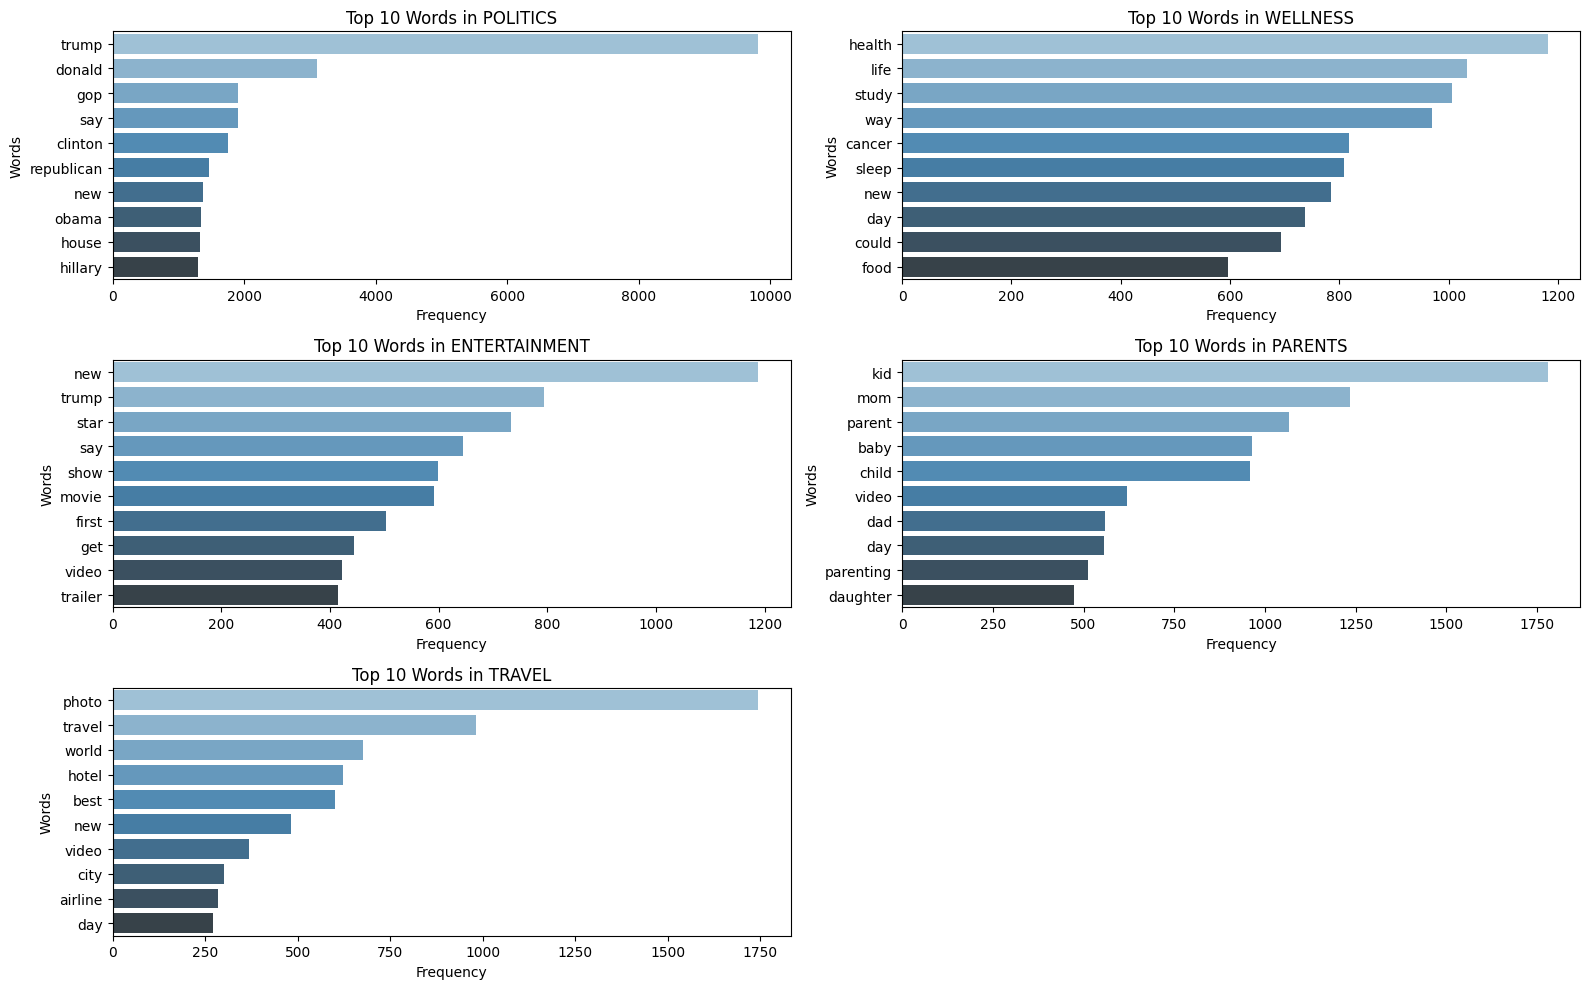

In [87]:
# Top 10 words in top 5 Category.

from collections import Counter

# Perform word frequency analysis for each category
category_word_counts = {}
for category in df['category'].unique():
    # Filter the dataframe for the current category
    category_df = df[df['category'] == category]
    
    # Combine all words in this category
    all_words = sum(category_df['headline_processed'], [])
    
    # Count word frequencies
    word_counts = Counter(all_words).most_common(10)  # Get top 10 most common words for the category
    category_word_counts[category] = dict(word_counts)

word_counts_df = pd.DataFrame(category_word_counts)# Loop through the top 5 categories

top_5_categories = df['category'].value_counts().index[:5]

plt.figure(figsize=(16, 10))

# Create subplots for the top 5 categories
for i, category in enumerate(top_5_categories, 1):
    # Get the top words for the current category
    top_words = word_counts_df[category].dropna().sort_values(ascending=False)[:10]  # Top 10 words

    # Create a subplot for each category
    plt.subplot(3, 2, i)
    sns.barplot(x=top_words.values, y=top_words.index, palette='Blues_d')
    
    # Set the title and labels
    plt.title(f'Top 10 Words in {category}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')

# Adjust layout
plt.tight_layout()
plt.show()


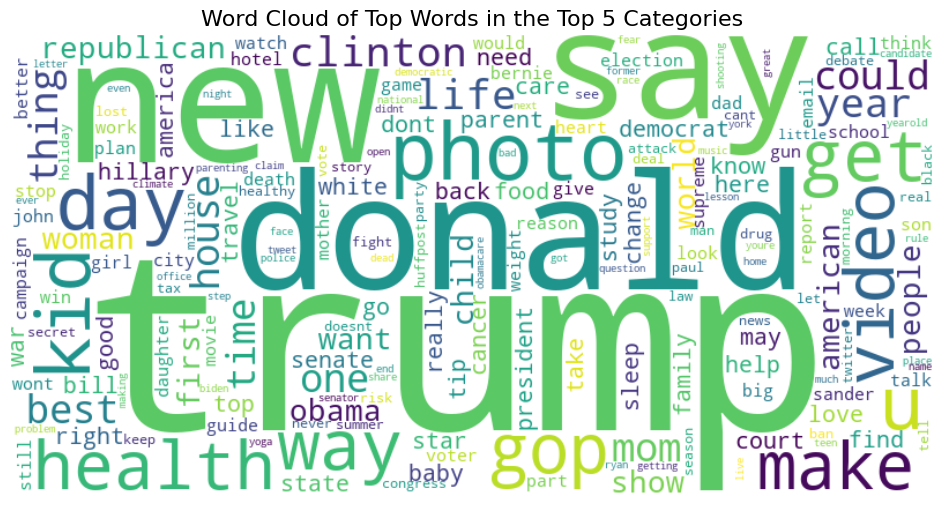

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Assuming 'df' is your DataFrame with columns 'category' and 'headline_processed'

# Get the top 5 categories based on their frequency
top_5_categories = df['category'].value_counts().index[:5]

# Initialize an empty list to hold words from the top categories
top_words = []

# Combine all words from the headlines in the top 5 categories
for category in top_5_categories:
    category_words = sum(df[df['category'] == category]['headline_processed'], [])
    top_words.extend(category_words)

# Count word frequencies for the combined words from top categories
word_counts = Counter(top_words)

# Create a word cloud with the combined words from top 5 categories
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plotting the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Top Words in the Top 5 Categories', fontsize=16)
plt.show()


**Politics**
- "Donald Trump" is the most searched keyword.

**Wellness**
- "Health," "life," and "sleep" are the most searched words.

**Entertainment**
- "Trump," "movie," and "video" are popular search terms.

**Parent**
- "Kid," "mom," "dad," and "daughter" are frequently searched words.

**Travel**
- "Hotel," "photo," "airline," and "vacation" are the most searched terms.


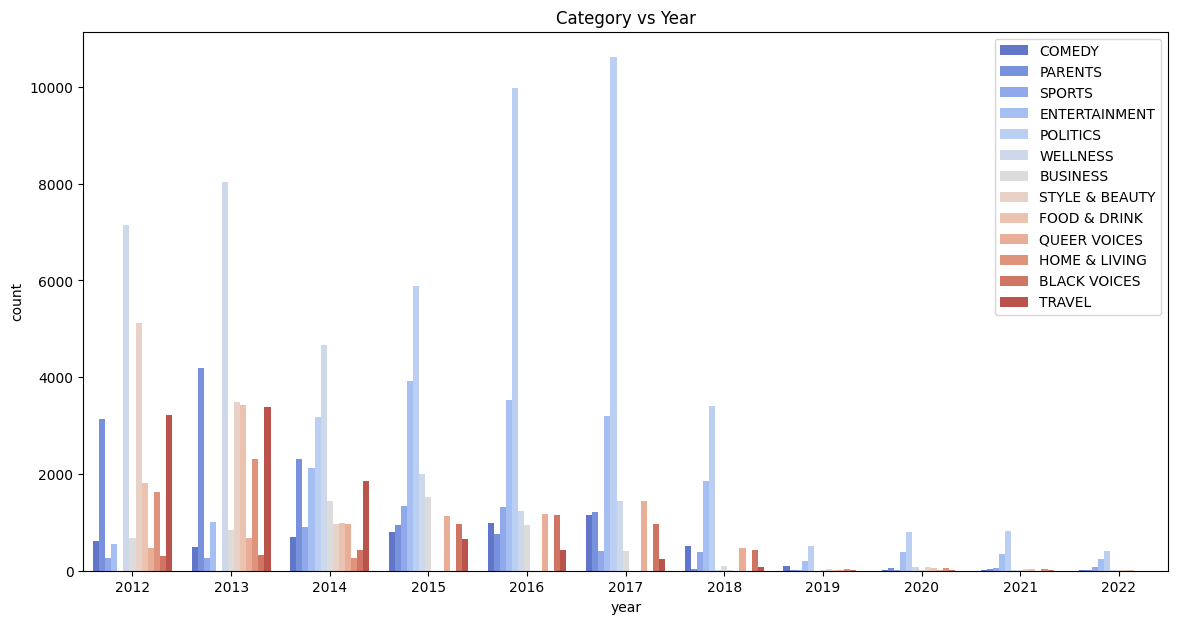

In [89]:
# Plotting category vs year
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='year', hue='category', palette='coolwarm')
plt.title('Category vs Year')
plt.legend(loc='upper right')
plt.show()


### Category vs. Year Distribution

The figure illustrates the distribution of articles across different categories over the years from 2012 to 2022. Key observations:

- **Peak in 2016-2017**: Categories like **Politics**, **Entertainment**, and **Sports** saw significant peaks during these years.
- **Earlier Years (2012-2014)**: Categories like **Wellness**, **Parents**, and **Food & Drink** dominated with more frequent publications.
- **Decline Post-2017**: After 2017, the number of articles across most categories dropped, with very few entries between 2018-2022.


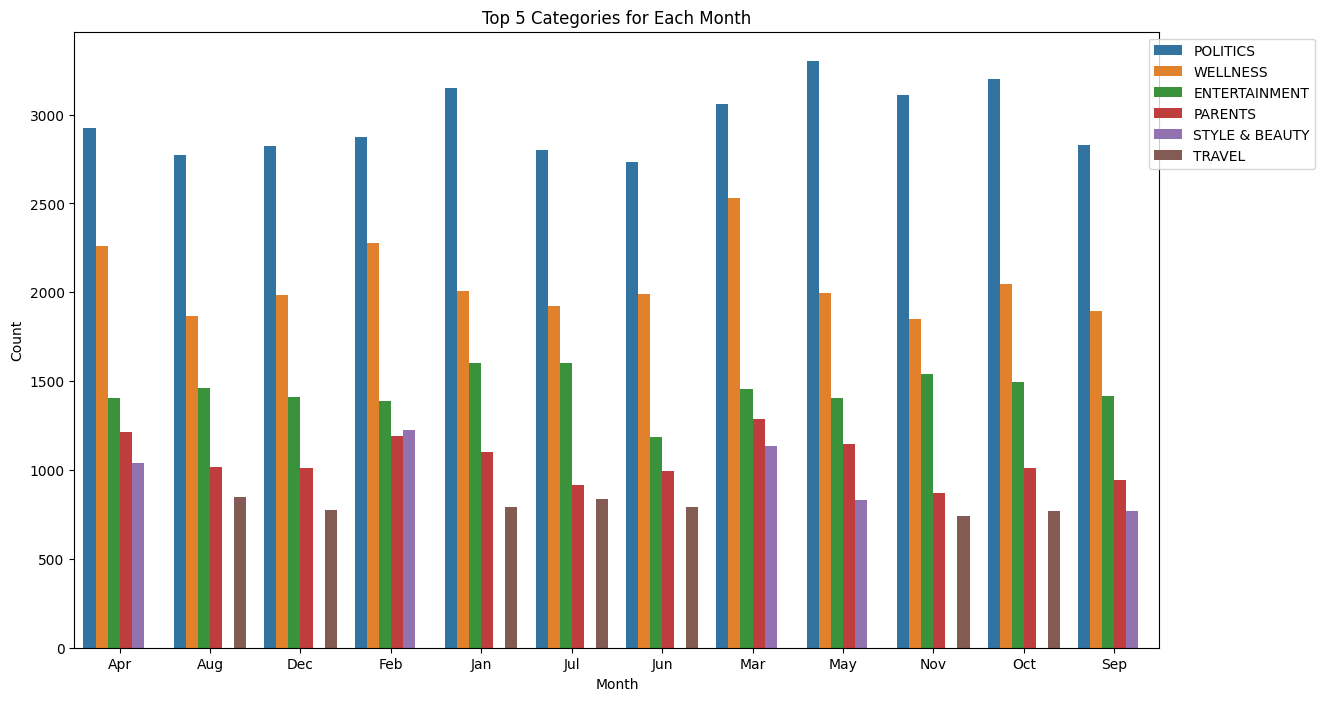

In [90]:
# Group by month and category, then count the occurrences of top 5 Category
category_counts = df.groupby(['month', 'category']).size().reset_index(name='count')

# Sort the counts by month and then by category count
category_counts = category_counts.sort_values(by=['month', 'count'], ascending=[True, False])

# Get the top 5 categories for each month
top5_categories_per_month = category_counts.groupby('month').head(5)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='count', hue='category', data=top5_categories_per_month, palette='tab10')
plt.title('Top 5 Categories for Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


- Every month, news related to Politics was the most frequent, followed by Wellness and then Entertainment.

In [91]:
def undersample_categories(df, target_column, max_count):
    # Group by the target column and apply undersampling
    undersampled_df = df.groupby(target_column).apply(
        lambda x: x.sample(min(len(x), max_count), random_state=42) if len(x) > max_count else x
    ).reset_index(drop=True)
    
    return undersampled_df

# Apply undersampling with a maximum of 10,000 instances per category
undersampled_df = undersample_categories(df, 'category', max_count=10000)

print("\nUndersampled Class Distribution:")
print(undersampled_df['category'].value_counts())

/tmp/ipykernel_30/808356743.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  undersampled_df = df.groupby(target_column).apply(



Undersampled Class Distribution:
category
ENTERTAINMENT     10000
POLITICS          10000
WELLNESS          10000
PARENTS           10000
TRAVEL             9898
STYLE & BEAUTY     9731
QUEER VOICES       6344
FOOD & DRINK       6340
BUSINESS           5989
COMEDY             5394
SPORTS             5077
BLACK VOICES       4582
HOME & LIVING      4317
Name: count, dtype: int64


In [92]:
df.sample()

,headline,category,short_description,year,month,day_of_week,headline_processed,short_description_processed,headline_length,description_length
85375,Donald Trump Tells Pro-Trump Super PACs To Cut It Out,ENTERTAINMENT,Statement comes after reports tying Trump to super PAC.,2015,Oct,Friday,"[donald, trump, tell, protrump, super, pac, cut]","[statement, come, report, tying, trump, super, pac]",7,7


# Traditional ML Approach

## Using TF-IDF vectorization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

- Train and evaluate on Naive Bayes

In [ ]:
# Ensure all values in 'headline_processed' are strings by joining lists if necessary
df["headline_processed"] = df["headline_processed"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Step 1: Convert text data into numerical form using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["headline_processed"].astype(str))  # Ensure all text data is a string

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.20, random_state=42)

# Step 3: Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 4: Make predictions with Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Step 5: Evaluate Naive Bayes model
print("Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


- Train and evaluate on LogisticRegression

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.20, random_state=42)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions with the Logistic Regression model
y_pred_lr = log_reg_model.predict(X_test)

# Evaluate the Logistic Regression model
print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

## Using with n-gram ranges

### Ngram range --> (1,2)

In [ ]:
# Step 1: If 'headline_processed' contains tokenized text (lists of words), convert lists back to strings
df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Step 2: Convert text data into numerical form using TfidfVectorizer with n-grams (1, 2)
vectorizer_1_2 = TfidfVectorizer(ngram_range=(1, 2))  # Use unigrams and bigrams

# Transform the text data to numeric form
X_1_2 = vectorizer_1_2.fit_transform(df["headline_processed"])  # Convert all text into numeric features

# Split the data into training and testing sets
X_train_1_2, X_test_1_2, y_train_1_2, y_test_1_2 = train_test_split(X_1_2, df['category'], test_size=0.2, random_state=42)



# Train Naive Bayes model
nb_model_1_2 = MultinomialNB()
nb_model_1_2.fit(X_train_1_2, y_train_1_2)

# Make predictions with Naive Bayes model
y_pred_nb_1_2 = nb_model_1_2.predict(X_test_1_2)

# Evaluate Naive Bayes model
print("\nNaive Bayes Model (N-grams 1, 2):")
print("Accuracy:", accuracy_score(y_test_1_2, y_pred_nb_1_2))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_1_2, y_pred_nb_1_2, average='weighted')
recall = recall_score(y_test_1_2, y_pred_nb_1_2, average='weighted')
f1 = f1_score(y_test_1_2, y_pred_nb_1_2, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_1_2, y_pred_nb_1_2))

In [ ]:
# Train Logistic Regression model
log_reg_model_1_2 = LogisticRegression(max_iter=1000)
log_reg_model_1_2.fit(X_train_1_2, y_train_1_2)

# Make predictions with Logistic Regression model
y_pred_lr_1_2 = log_reg_model_1_2.predict(X_test_1_2)

# Evaluate Logistic Regression model
print("\nLogistic Regression Model (N-grams 1, 2):")
print("Accuracy:", accuracy_score(y_test_1_2, y_pred_lr_1_2))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_1_2, y_pred_lr_1_2, average='weighted')
recall = recall_score(y_test_1_2, y_pred_lr_1_2, average='weighted')
f1 = f1_score(y_test_1_2, y_pred_lr_1_2, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_1_2, y_pred_lr_1_2))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 1: If 'headline_processed' contains tokenized text (lists of words), convert lists back to strings
df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Step 2: Convert text data into numerical form using TfidfVectorizer with n-grams (1, 3)
vectorizer_1_3 = TfidfVectorizer(ngram_range=(1, 3))  # Use unigrams, bigrams, and trigrams

# Transform the text data to numeric form
X_1_3 = vectorizer_1_3.fit_transform(df["headline_processed"])  # Convert all text into numeric features

# Step 3: Split the data into training and testing sets
X_train_1_3, X_test_1_3, y_train_1_3, y_test_1_3 = train_test_split(X_1_3, df['category'], test_size=0.2, random_state=42)

# Step 4: Train Naive Bayes model
nb_model_1_3 = MultinomialNB()
nb_model_1_3.fit(X_train_1_3, y_train_1_3)

# Step 5: Make predictions with Naive Bayes model
y_pred_nb_1_3 = nb_model_1_3.predict(X_test_1_3)

# Step 6: Evaluate Naive Bayes model
print("Naive Bayes Model (N-grams 1, 3):")
print("Accuracy:", accuracy_score(y_test_1_3, y_pred_nb_1_3))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_1_3, y_pred_nb_1_3, average='weighted')
recall = recall_score(y_test_1_3, y_pred_nb_1_3, average='weighted')
f1 = f1_score(y_test_1_3, y_pred_nb_1_3, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_1_3, y_pred_nb_1_3))


In [ ]:


# Step 1: If 'headline_processed' contains tokenized text (lists of words), convert lists back to strings
df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Step 2: Convert text data into numerical form using TfidfVectorizer with n-grams (1, 3)
vectorizer_1_3 = TfidfVectorizer(ngram_range=(1, 3))  # Use unigrams, bigrams, and trigrams

# Transform the text data to numeric form
X_1_3 = vectorizer_1_3.fit_transform(df["headline_processed"])  # Convert all text into numeric features

# Step 3: Split the data into training and testing sets
X_train_1_3, X_test_1_3, y_train_1_3, y_test_1_3 = train_test_split(X_1_3, df['category'], test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression model
log_reg_model_1_3 = LogisticRegression(max_iter=1000)
log_reg_model_1_3.fit(X_train_1_3, y_train_1_3)

# Step 5: Make predictions with Logistic Regression model
y_pred_lr_1_3 = log_reg_model_1_3.predict(X_test_1_3)

# Step 6: Evaluate Logistic Regression model
print("\nLogistic Regression Model (N-grams 1, 3):")
print("Accuracy:", accuracy_score(y_test_1_3, y_pred_lr_1_3))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_1_3, y_pred_lr_1_3, average='weighted')
recall = recall_score(y_test_1_3, y_pred_lr_1_3, average='weighted')
f1 = f1_score(y_test_1_3, y_pred_lr_1_3, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_1_3, y_pred_lr_1_3))

# Model Performance Summary



| Model                                   | Accuracy (%) | Precision (%) | Recall (%)  | F1 Score (%) |
|-----------------------------------------|--------------|---------------|-------------|--------------|
| **Naive Bayes Model**                   | 61.76        | 71.37         | 61.76       | 56.59        |
| **Logistic Regression Model**           | 74.48        | 74.77         | 74.48       | 73.76        |
| **Naive Bayes Model (N-grams 1, 2)**    | 54.20        | 68.87         | 54.20       | 47.57        |
| **Logistic Regression Model (N-grams 1, 2)** | 73.20    | 74.42         | 73.20       | 72.14        |
| **Naive Bayes Model (N-grams 1, 3)**    | 50.41        | 72.07         | 50.41       | 43.07        |
| **Logistic Regression Model (N-grams 1, 3)** | 71.18    | 73.01         | 71.18       | 69.69        |


# Deep Learning Apporach

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, BatchNormalization, Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Combine processed text into a single column for tokenization
df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x))


In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  
tokenizer.fit_on_texts(df['headline_processed'])
sequences = tokenizer.texts_to_sequences(df['headline_processed'])

# Pad the sequences
max_length = 100  # Adjust max_length based on your data
X = pad_sequences(sequences, maxlen=max_length)
y = df['category']

# Convert labels to numeric values
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Ensure TensorFlow uses the GPU if available
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print(f"GPU detected: {physical_devices}")
    try:
        # Set memory growth to avoid memory allocation issues
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected. Using CPU instead.")




In [ ]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data):
        super(MetricsCallback, self).__init__()
        self.val_data = val_data

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.val_data
        y_pred = np.argmax(self.model.predict(X_val), axis=-1)
        
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        print(f"Epoch {epoch + 1}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

In [ ]:
# Define the enhanced model with additional layers
with tf.device('/GPU:0'):  # Explicitly set the GPU device
    model = Sequential()

    # Embedding Layer
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))  

    # Add Bi-LSTM Layer
    model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.30)))  # Return sequences to stack more LSTM layers

    # Add another Bi-LSTM Layer
    model.add(Bidirectional(LSTM(64, dropout=0.30)))  # Stack another LSTM with fewer units

    # Add Batch Normalization to stabilize and accelerate training
    model.add(BatchNormalization())

    # Add another Dense Layer with Dropout to avoid overfitting
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization added
    model.add(Dropout(0.4))  # Dropout layer with 40% rate

    # Add Output Layer
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output for multi-class classification

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create an instance of the MetricsCallback with validation data
metrics_callback = MetricsCallback(val_data=(X_test, y_test))

# Train the model on the GPU with the custom callback
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train,
                        epochs=6,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        callbacks=[metrics_callback])

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# If using a feedforward model, you can also print loss
print(f"Test Loss: {loss:.2f}")


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits for accuracy

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1)  # Set y-axis limits for loss

plt.tight_layout()
plt.show()

### Model Test Results

| Metric        | Value (%) |
|---------------|-----------|
| **Test Accuracy** | 73.00     |
| **Test Loss**     | 1.03      |
| **Precision**     | 72.67     |
| **Recall**        | 72.68     |
| **F1 Score**      | 72.61     |


#  Transfer Learning Approach

### Distillbert 

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:

# # Convert list of words to sentences
# df['headline'] = df['headline'].apply(lambda x: ' '.join(x))

# Label encode the categories
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['category_encoded'], test_size=0.2, random_state=42)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder.classes_)).to(device)

In [ ]:
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = CustomDataset(X_test, y_test, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=16, pin_memory=True if device.type == 'cpu' else False)
test_loader = DataLoader(test_dataset, batch_size=16, pin_memory=True if device.type == 'cpu' else False)

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)



In [ ]:
trainer.train()

In [ ]:
# Evaluate the model on the test dataset and print results including losses and metrics.
eval_results = trainer.evaluate()
print("Evaluation Results:")
print(eval_results)

### Evaluation Results

| Metric              | Value       |
|---------------------|-------------|
| **Accuracy**        | 79.13%      |
| **Precision**       | 79.13%      |
| **Recall**          | 79.13%      |
| **F1 Score**        | 79.10%      |


### Roberta

In [100]:
import pandas as pd
import numpy as np
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
from torch.utils.data import Dataset

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [101]:
# Label encode the categories
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['headline'], 
    df['category_encoded'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['category_encoded']  # Ensure stratified sampling
)


In [102]:
import pandas as pd

# Original class distribution
original_distribution = df['category_encoded'].value_counts(normalize=True)

# Training set class distribution
train_distribution = pd.Series(y_train).value_counts(normalize=True)

# Testing set class distribution
test_distribution = pd.Series(y_test).value_counts(normalize=True)

# Print the distributions
print("Original distribution:")
print(original_distribution)

print("\nTraining set distribution:")
print(train_distribution)

print("\nTesting set distribution:")
print(test_distribution)


Original distribution:
category_encoded
7     0.240539
12    0.166461
3     0.117329
6     0.085866
11    0.066901
10    0.065772
8     0.042879
4     0.042852
1     0.040480
2     0.036458
9     0.034315
0     0.030970
5     0.029179
Name: proportion, dtype: float64

Training set distribution:
category_encoded
7     0.240537
12    0.166458
3     0.117328
6     0.085865
11    0.066898
10    0.065774
8     0.042878
4     0.042852
1     0.040478
2     0.036457
9     0.034319
0     0.030973
5     0.029182
Name: proportion, dtype: float64

Testing set distribution:
category_encoded
7     0.240546
12    0.166470
3     0.117333
6     0.085871
11    0.066912
10    0.065763
8     0.042885
4     0.042851
1     0.040485
2     0.036464
9     0.034301
0     0.030955
5     0.029164
Name: proportion, dtype: float64


In [103]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenize the text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [104]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Create datasets with max_length=128
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = CustomDataset(X_test, y_test, tokenizer, max_length=128)


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [105]:
model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base', 
    num_labels=len(label_encoder.classes_)
).to(device)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [106]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,                   # Fewer epochs for large datasets
    per_device_train_batch_size=16,       # Batch size
    per_device_eval_batch_size=16,        # Evaluation batch size
    warmup_steps=500,                     # Warmup steps for stabilization
    weight_decay=0.01,                    # Regularization
    learning_rate=2e-5,                   # Learning rate
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",          # Evaluate at intervals
    eval_steps=1000,                      # Evaluate every 1000 steps
    save_strategy="epoch",                # Save at the end of each epoch
    save_total_limit=2,                   # Save only the last 2 checkpoints
    fp16=True if torch.cuda.is_available() else False,  # Use mixed precision on GPU
)


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [107]:
# Overall metrics for evaluation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# Category-wise metrics
def evaluate_by_category(trainer, test_dataset, label_encoder):
    # Get raw predictions
    predictions = trainer.predict(test_dataset)
    preds = predictions.predictions.argmax(-1)  # Predicted class indices
    labels = predictions.label_ids  # True labels
    
    # Decode labels and predictions to original category names
    label_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    
    # Generate classification report
    report = classification_report(
        labels,
        preds,
        target_names=label_names,
        digits=4  # Control decimal places in the output
    )
    
    print("Category-wise Metrics:")
    print(report)


In [108]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)


/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [109]:
# Train the model
trainer.train()

# Evaluate the model (overall metrics)
eval_results = trainer.evaluate()
print("Overall Evaluation Results:")
print(eval_results)

# Evaluate by category (per-class metrics)
evaluate_by_category(trainer, test_dataset, label_encoder)


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1000,0.823500,0.757385,0.780392,0.779460,0.775944,0.779460
2000,0.666700,0.675608,0.797317,0.798587,0.796826,0.798587
3000,0.732800,0.640473,0.806073,0.809199,0.804659,0.809199
4000,0.529500,0.629422,0.809913,0.810179,0.807997,0.810179
5000,0.566900,0.613467,0.813710,0.816059,0.813297,0.816059
6000,0.593300,0.598017,0.816209,0.818762,0.816456,0.818762
7000,0.540200,0.584525,0.818826,0.819202,0.818389,0.819202
8000,0.416000,0.595690,0.820651,0.822345,0.820530,0.822345
9000,0.337200,0.587096,0.820836,0.823257,0.821441,0.823257
10000,0.402900,0.585029,0.823778,0.826163,0.823955,0.826163


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

Overall Evaluation Results:
{'eval_loss': 0.5777818560600281, 'eval_precision': 0.8242329157776639, 'eval_recall': 0.8262647426582407, 'eval_f1': 0.824858393955989, 'eval_accuracy': 0.8262647426582407, 'eval_runtime': 151.6365, 'eval_samples_per_second': 195.144, 'eval_steps_per_second': 6.1, 'epoch': 3.0}


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Category-wise Metrics:
                precision    recall  f1-score   support

  BLACK VOICES     0.6391    0.5644    0.5994       916
      BUSINESS     0.7056    0.6703    0.6875      1198
        COMEDY     0.6710    0.5765    0.6201      1079
 ENTERTAINMENT     0.8169    0.8249    0.8209      3472
  FOOD & DRINK     0.8290    0.8375    0.8333      1268
 HOME & LIVING     0.8227    0.8227    0.8227       863
       PARENTS     0.8017    0.7985    0.8001      2541
      POLITICS     0.8879    0.9055    0.8966      7118
  QUEER VOICES     0.8138    0.7439    0.7773      1269
        SPORTS     0.8399    0.8217    0.8307      1015
STYLE & BEAUTY     0.8670    0.8674    0.8672      1946
        TRAVEL     0.8452    0.8687    0.8568      1980
      WELLNESS     0.8191    0.8551    0.8367      4926

      accuracy                         0.8263     29591
     macro avg     0.7968    0.7813    0.7884     29591
  weighted avg     0.8242    0.8263    0.8249     29591



In [54]:
# Save the model after training
model_save_path = './saved_model'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

# Create a zip file of the saved model directory for easy download
shutil.make_archive(model_save_path, 'zip', model_save_path)

# Move the zip file to the appropriate location for downloading in Kaggle environment
shutil.move(f'{model_save_path}.zip', '/kaggle/working/')

NameError: name 'model' is not defined

In [44]:
import pandas as pd
import numpy as np
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
from torch.utils.data import Dataset
import shutil
import os

In [43]:
# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [44]:
# Label encode the categories
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Split data into train and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    df['headline'], 
    df['category_encoded'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['category_encoded']  # Ensure stratified sampling
)

In [45]:


class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenize the text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [46]:






tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Create datasets with max_length=128
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = CustomDataset(X_test, y_test, tokenizer, max_length=128)

model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base', 
    num_labels=len(label_encoder.classes_)
).to(device)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,                   # Fewer epochs for large datasets
    per_device_train_batch_size=16,       # Batch size
    per_device_eval_batch_size=16,        # Evaluation batch size
    warmup_steps=500,                     # Warmup steps for stabilization
    weight_decay=0.01,                    # Regularization
    learning_rate=2e-5,                   # Learning rate
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",          # Evaluate at intervals
    eval_steps=1000,                      # Evaluate every 1000 steps
    save_strategy="epoch",                # Save at the end of each epoch
    save_total_limit=2,                   # Save only the last 2 checkpoints
    fp16=True if torch.cuda.is_available() else False,  # Use mixed precision on GPU
)

# Overall metrics for evaluation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# Category-wise metrics
def evaluate_by_category(trainer, test_dataset, label_encoder):
    # Get raw predictions
    predictions = trainer.predict(test_dataset)
    preds = predictions.predictions.argmax(-1)  # Predicted class indices
    labels = predictions.label_ids  # True labels
    
    # Decode labels and predictions to original category names
    label_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    
    # Generate classification report
    report = classification_report(
        labels,
        preds,
        target_names=label_names,
        digits=4  # Control decimal places in the output
    )
    
    print("Category-wise Metrics:")
    print(report)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)






tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [47]:
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1000,0.925000,0.860958,0.760243,0.759927,0.752345,0.759927
2000,0.810400,0.752554,0.781695,0.778514,0.777799,0.778514
3000,0.889000,0.716812,0.788898,0.791187,0.785356,0.791187
4000,0.621900,0.701407,0.793211,0.794465,0.791801,0.794465
5000,0.664100,0.677896,0.801144,0.799398,0.796230,0.799398
6000,0.650400,0.646728,0.801442,0.802372,0.798901,0.802372
7000,0.735700,0.642988,0.802226,0.802812,0.799721,0.802812
8000,0.304200,0.646163,0.808027,0.808286,0.805476,0.808286
9000,0.634900,0.653714,0.809926,0.810145,0.808491,0.810145
10000,0.530900,0.647716,0.809835,0.810382,0.808739,0.810382


TrainOutput(global_step=36990, training_loss=0.4814501504715664, metrics={'train_runtime': 11803.2762, 'train_samples_per_second': 50.139, 'train_steps_per_second': 3.134, 'total_flos': 3.89311252763136e+16, 'train_loss': 0.4814501504715664, 'epoch': 5.0})

In [48]:
# Evaluate the model (overall metrics)
eval_results = trainer.evaluate()
print("Overall Evaluation Results:")
print(eval_results)



Overall Evaluation Results:
{'eval_loss': 0.7199182510375977, 'eval_precision': 0.8234896791747292, 'eval_recall': 0.8245750397080194, 'eval_f1': 0.8236555282791695, 'eval_accuracy': 0.8245750397080194, 'eval_runtime': 114.6534, 'eval_samples_per_second': 258.091, 'eval_steps_per_second': 16.136, 'epoch': 5.0}


In [49]:
# Evaluate by category (per-class metrics)
evaluate_by_category(trainer, test_dataset, label_encoder)

# Save the model after training
model_save_path = './saved_model'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

# Create a zip file of the saved model directory for easy download
shutil.make_archive(model_save_path, 'zip', model_save_path)

# Move the zip file to the appropriate location for downloading in Kaggle environment
shutil.move(f'{model_save_path}.zip', '/kaggle/working/')

Category-wise Metrics:
                precision    recall  f1-score   support

  BLACK VOICES     0.6218    0.5886    0.6048       863
      BUSINESS     0.7127    0.6315    0.6696      1194
        COMEDY     0.6693    0.6091    0.6378      1100
 ENTERTAINMENT     0.8123    0.8214    0.8168      3488
  FOOD & DRINK     0.8541    0.8100    0.8315      1337
 HOME & LIVING     0.8322    0.8235    0.8278       867
       PARENTS     0.7987    0.7805    0.7895      2542
      POLITICS     0.8934    0.8956    0.8945      7057
  QUEER VOICES     0.7818    0.7888    0.7853      1217
        SPORTS     0.8318    0.8211    0.8265      1012
STYLE & BEAUTY     0.8721    0.8712    0.8717      1988
        TRAVEL     0.8632    0.8662    0.8647      2003
      WELLNESS     0.8036    0.8621    0.8318      4923

      accuracy                         0.8246     29591
     macro avg     0.7959    0.7823    0.7886     29591
  weighted avg     0.8235    0.8246    0.8237     29591



Error: Destination path '/kaggle/working/saved_model.zip' already exists

In [65]:
import os

# Save the model and tokenizer
model_save_path = './saved_model'
try:
    print("Saving model...")
    model.save_pretrained(model_save_path)
    tokenizer.save_pretrained(model_save_path)

    # Verify the directory was created
    if not os.path.exists(model_save_path):
        raise FileNotFoundError(f"The directory {model_save_path} was not created.")

    print(f"Model and tokenizer successfully saved in {model_save_path}")

except Exception as e:
    print(f"An error occurred while saving the model: {e}")


Saving model...
Model and tokenizer successfully saved in ./saved_model


In [66]:
import os

model_save_path = './saved_model'
if os.path.exists(model_save_path):
    print("Model directory exists:", model_save_path)
    print("Contents:", os.listdir(model_save_path))
else:
    print("Model directory does not exist. Something went wrong during saving.")


Model directory exists: ./saved_model
Contents: ['config.json', 'model.safetensors', 'merges.txt', 'special_tokens_map.json', 'tokenizer_config.json', 'vocab.json']


In [68]:
import os

model_save_path = './saved_model'

if os.path.exists(model_save_path):
    print("Model directory exists:", model_save_path)
    print("Contents:", os.listdir(model_save_path))
else:
    print("Model directory does not exist. Re-saving the model...")
    # Re-save model if it doesn't exist
    model.save_pretrained(model_save_path)
    tokenizer.save_pretrained(model_save_path)

    # Check again
    if os.path.exists(model_save_path):
        print("Directory successfully created.")
    else:
        print("Failed to create model directory. Investigate saving step.")


Model directory does not exist. Re-saving the model...
Directory successfully created.


In [69]:
import shutil
import os

source_path = './saved_model'
destination_path = '/kaggle/working/saved_model'

print("Saving model and moving immediately...")
model.save_pretrained(source_path)
tokenizer.save_pretrained(source_path)

if os.path.exists(source_path):
    print(f"Moving {source_path} to {destination_path}...")
    shutil.move(source_path, destination_path)
    print(f"Model directory successfully moved to {destination_path}!")
else:
    print("Directory not found after saving. Something went wrong.")


Saving model and moving immediately...
Moving ./saved_model to /kaggle/working/saved_model...
Model directory successfully moved to /kaggle/working/saved_model!


In [70]:
import shutil

model_save_path = '/kaggle/working/saved_model'
zip_file_path = '/kaggle/working/saved_model.zip'

print("Zipping the model directory...")
shutil.make_archive(model_save_path, 'zip', model_save_path)
print(f"Zip file created at {zip_file_path}")


Zipping the model directory...
Zip file created at /kaggle/working/saved_model.zip


In [71]:
# Assuming the 'label_encoder' is already fitted (as in your provided code)

# Extract the category names and their corresponding encoded labels
category_labels = label_encoder.classes_

# Create a mapping of the encoded label to the category name
label_mapping = {i: category for i, category in enumerate(category_labels)}

# Print the label mapping
print("Label to Category Mapping:")
for label, category in label_mapping.items():
    print(f"{label}: {category}")

# Optionally, you can save this mapping to a file (e.g., JSON) if needed
import json
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

# Now, when you need to make predictions, you can use this mapping to decode the model's outputs


Label to Category Mapping:
0: BLACK VOICES
1: BUSINESS
2: COMEDY
3: ENTERTAINMENT
4: FOOD & DRINK
5: HOME & LIVING
6: PARENTS
7: POLITICS
8: QUEER VOICES
9: SPORTS
10: STYLE & BEAUTY
11: TRAVEL
12: WELLNESS


In [5]:
import matplotlib.pyplot as plt

# Extract metrics for visualization purposes
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
metrics_values = [eval_results['eval_accuracy'], eval_results['eval_precision'], eval_results['eval_recall'], eval_results['eval_f1']]

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1

# Show percentages on top of the bars
for i in range(len(metrics_values)):
    plt.text(i, metrics_values[i] + 0.01, f'{metrics_values[i]:.2f}', ha='center')

plt.show()

NameError: name 'eval_results' is not defined

### Evaluation Results

| Metric                  | Value       |
|-------------------------|-------------|
| **Accuracy**            | 80.42%      |
| **Precision**           | 80.38%      |
| **Recall**              | 80.42%      |
| **F1 Score**            | 80.36%      |


In [50]:
# Save the model after training
model_save_path = './saved_model'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

# Create a zip file of the saved model directory for easy download
shutil.make_archive(model_save_path, 'zip', model_save_path)

# Check if the destination file already exists and remove it if necessary
zip_file_path = '/kaggle/working/saved_model.zip'
if os.path.exists(zip_file_path):
    os.remove(zip_file_path)

# Move the zip file to the appropriate location for downloading in Kaggle environment
shutil.move(f'{model_save_path}.zip', zip_file_path)


FileNotFoundError: [Errno 2] No such file or directory: './saved_model.zip'

## Comparison of Models Based on F1 Score

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Logistic Regression', 'RoBerta', 'Bi-LSTM']
f1_score = [0.7403, 0.8036, 0.7261]

# Convert F1 scores to percentages
f1_score_percentage = [score * 100 for score in f1_score]

# Preparing the data for plotting
x = np.arange(len(models))
bar_width = 0.5

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(x, f1_score_percentage, width=bar_width, color=['skyblue', 'orange', 'green'])

# Adding labels and title
plt.title('Model Performance Metrics (F1 Score in %)')
plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.xticks(x, models)
plt.ylim(60, 100)  # Set y-axis limits to focus on the relevant range

# Adding value labels on top of each bar (rounded to 2 decimal places)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Remove grid lines
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()


- RoBERTa outperforms the others with an F1 Score of **80.36%**.
- Bi-LSTM achieves an F1 Score of **72.61%**.
- Logistic Regression records an F1 Score o ****74.03%*.


# Future Scopes

- Experiment with more sophisticated models like Transformer-based architectures (e.g., GPT-4)
- Extend the model to support multiple languages, catering to a global audience.- Integrate advanced libraries like TextBlob or SpaCy to automatically correct spelling,  improving data quality and model accuracy.

